In [51]:
%matplotlib inline

%load_ext autoreload
%autoreload 1

from __future__ import print_function, absolute_import, division
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '.')
%aimport machine_learning_sptypes
ml = machine_learning_sptypes
from sklearn import *
from treeinterpreter import treeinterpreter as ti

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
X, y, colours, labels = ml.build_training_data()
print('Read {} features for {} objects'.format(X.shape[1], X.shape[0]))

________________________________________________________________________________
[Memory] Calling machine_learning_sptypes.build_training_data...
build_training_data()
534451 unique objects
Including 8 filters: ['B', 'H', 'I', 'J', 'K', 'R', 'U', 'V']
['U', 'B', 'V', 'R', 'I', 'J', 'H', 'K']
_____________________________________________build_training_data - 57.2s, 1.0min
Read 28 features for 80443 objects


The data set contains nans where no colour information is available. We must replace these nans with something useful. A common technique is to replace the nan values with the mean of the feature. We use `preprocessing.Imputer` for this.

In [53]:
imp = preprocessing.Imputer()
imp.fit(X)
X_trans = imp.transform(X)

Use `build_predictor` to build the best machine for the data set. This performs a cross-validated search for the data set.

In [74]:
machine = ml.build_predictor(X_trans, y)

Let's have a look numerically about how close we are. We use `cross_val_score`, which repeatedly and randomly splits the data into chunks, and computes the score.

In [75]:
cv_score = model_selection.cross_val_score(machine, X_trans, y).mean()

In [76]:
print('Mean score when cross-validating: {:.2f}%'.format(cv_score * 100.))

Mean score when cross-validating: 23.67%


In [89]:
prediction = model_selection.cross_val_predict(machine, X_trans, y)

In [92]:
conf = metrics.confusion_matrix(y_true=y, y_pred=prediction, labels=machine.classes_)

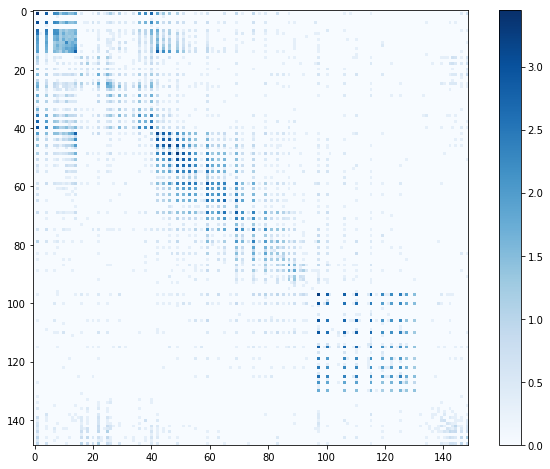

In [93]:
fig, axis = plt.subplots(figsize=(11, 8))
mappable = axis.imshow(np.log10(conf + 1), interpolation='nearest', cmap='Blues')
fig.colorbar(mappable, ax=axis)

In [94]:
print(metrics.classification_report(y_true=y, y_pred=prediction, labels=machine.classes_))

             precision    recall  f1-score   support

      A0.5V       0.00      0.00      0.00         3
        A0V       0.36      0.55      0.44      5148
      A1.5V       0.00      0.00      0.00         2
      A1.7V       0.00      0.00      0.00         1
        A1V       0.19      0.19      0.19      2586
      A2.5V       0.00      0.00      0.00         2
      A2.7V       0.00      0.00      0.00         1
        A2V       0.14      0.10      0.12      1347
        A3V       0.16      0.14      0.15      1150
        A4V       0.07      0.03      0.04       402
        A5V       0.11      0.09      0.10       573
        A6V       0.26      0.29      0.28       619
        A7V       0.08      0.06      0.07       606
        A8V       0.13      0.09      0.11       788
        A9V       0.27      0.29      0.28      2013
      B0.2V       0.00      0.00      0.00        11
      B0.5V       0.10      0.09      0.10       123
      B0.7V       0.00      0.00      0.00   